# Ibtk: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Ibtk'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30509089,C57BL/6N,m,control,wt (Ibtk),26.7,91.32,61.54,2.78,1.14
1,30509127,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29
2,30509159,C57BL/6N,f,control,wt (Ibtk),18.8,73.60,41.30,3.12,1.89


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30509127,Ibtk_2v2_33.dcm,2.910174,2.732500,1.073256,2.580000,654.545455,2.732500,0.967411,high,0.967411,high,32.489746,2.491558,92.331248,63.120567,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.129826,2.975087,-0.216744,1.181628,4.591248,6.930567
1,30509127,Ibtk_2v2_33.dcm,2.868895,2.824167,1.073256,2.673333,595.041322,2.824167,0.967411,high,0.967411,high,31.370583,2.491558,92.057661,62.589928,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.171105,2.954448,-0.216744,1.181628,4.317661,6.399928
2,30509127,Ibtk_2v2_33.dcm,2.992733,2.925000,1.465407,2.765833,615.384615,2.925000,0.957197,high,0.967411,high,34.793081,5.698723,83.621101,51.034483,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.047267,3.016366,0.175407,1.377703,-4.118899,-5.155517
3,30509127,Ibtk_2v2_33.dcm,2.806977,3.022500,1.341570,2.860000,595.041322,3.022500,0.957197,high,0.957197,high,29.732323,4.517352,84.806594,52.205882,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.233023,2.923488,0.051570,1.315785,-2.933406,-3.984118
4,30509127,Ibtk_2v2_33.dcm,3.034012,3.123333,1.362209,2.955833,610.169492,3.123333,0.996028,high,0.957197,high,35.977352,4.703126,86.927537,55.102041,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.005988,3.037006,0.072209,1.326105,-0.812463,-1.087959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,30509127,Ibtk_2v2_30.dcm,2.497384,4.332500,1.155814,4.395000,545.454545,4.332500,0.799027,high,0.937512,high,22.263310,3.039645,86.346843,53.719008,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.542616,2.768692,-0.134186,1.222907,-1.393157,-2.470992
149,30509127,Ibtk_2v2_30.dcm,2.724419,4.442500,0.908140,4.487500,600.000000,4.442500,0.937512,high,0.937512,high,27.623261,1.584791,94.262839,66.666667,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.315581,2.882209,-0.381860,1.099070,6.522839,10.476667
150,30509127,Ibtk_2v2_30.dcm,2.476744,4.542500,1.135174,4.578333,712.871287,4.542500,0.937512,high,0.937512,high,21.807783,2.896510,86.718001,54.166667,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.563256,2.758372,-0.154826,1.212587,-1.021999,-2.023333
151,30509127,Ibtk_2v2_30.dcm,2.662500,4.626667,0.928779,4.668333,642.857143,4.626667,0.937512,high,0.788016,high,26.097677,1.684808,93.544224,65.116279,C57BL/6N,f,control,wt (Ibtk),22.6,87.74,56.19,3.04,1.29,-0.377500,2.851250,-0.361221,1.109390,5.804224,8.926279


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

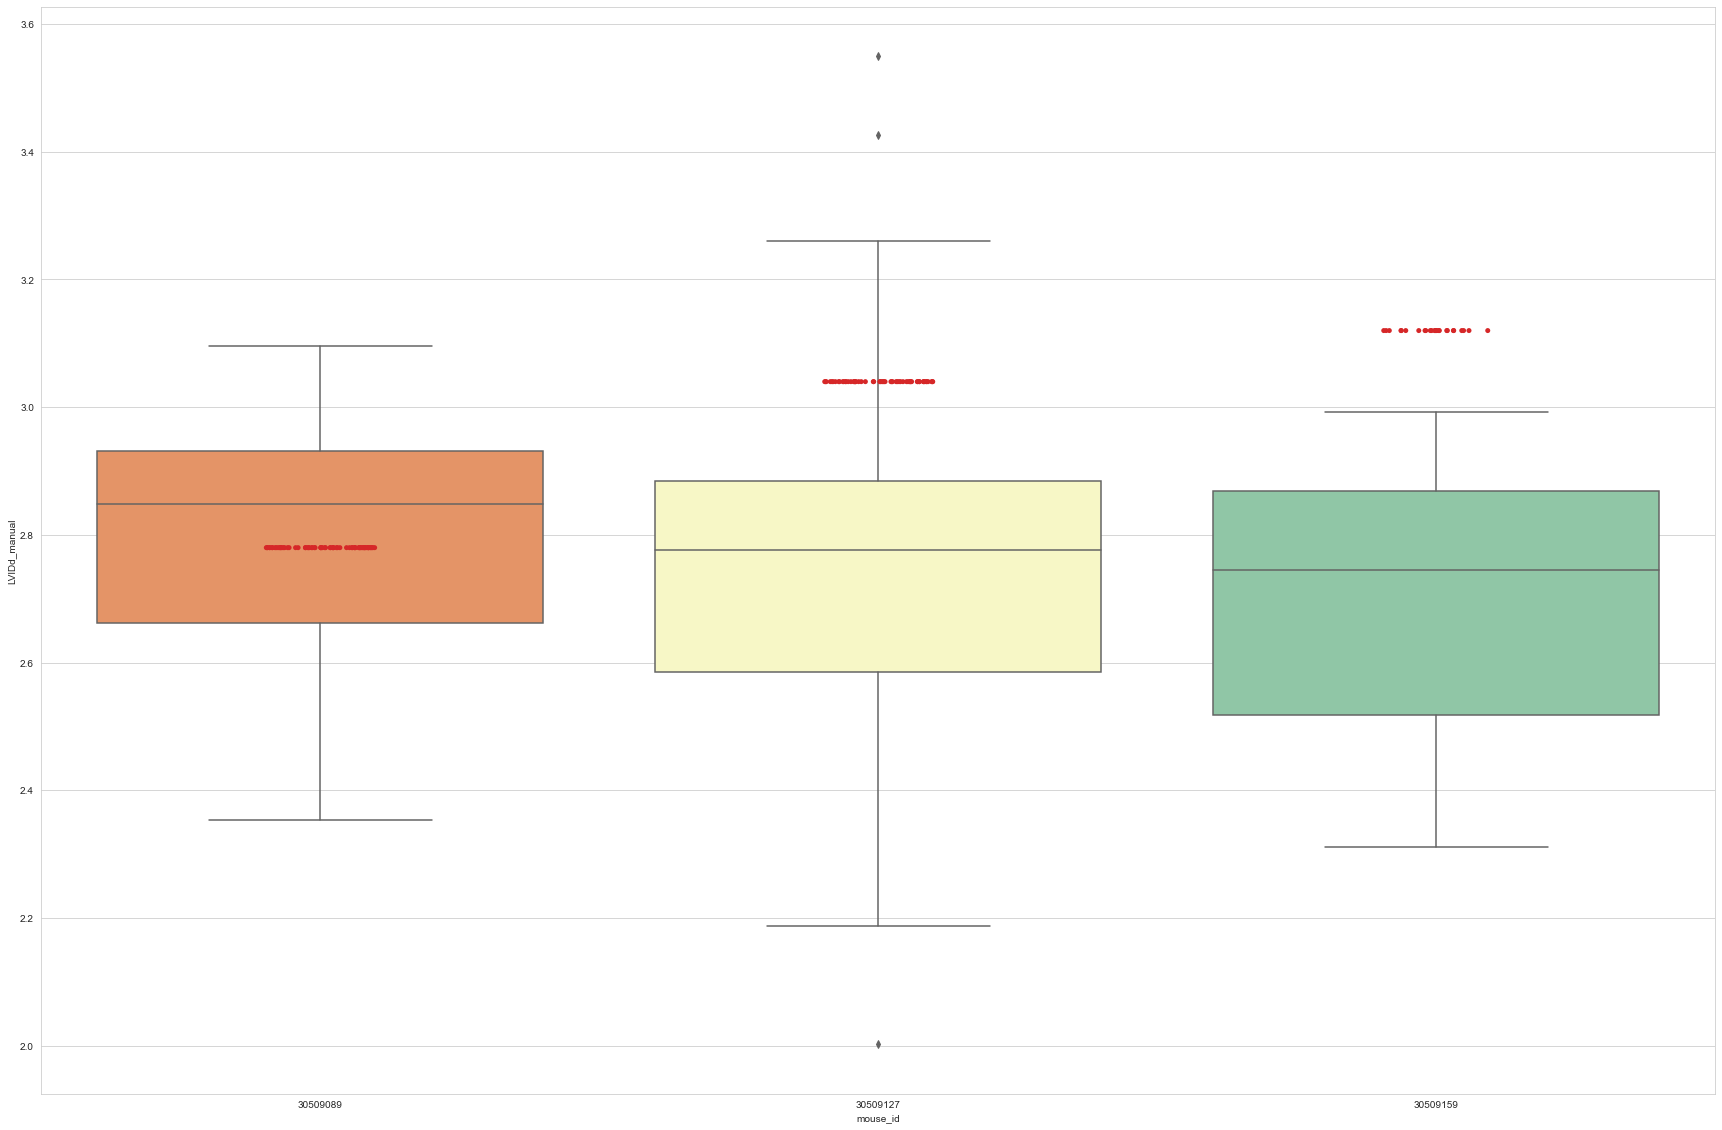

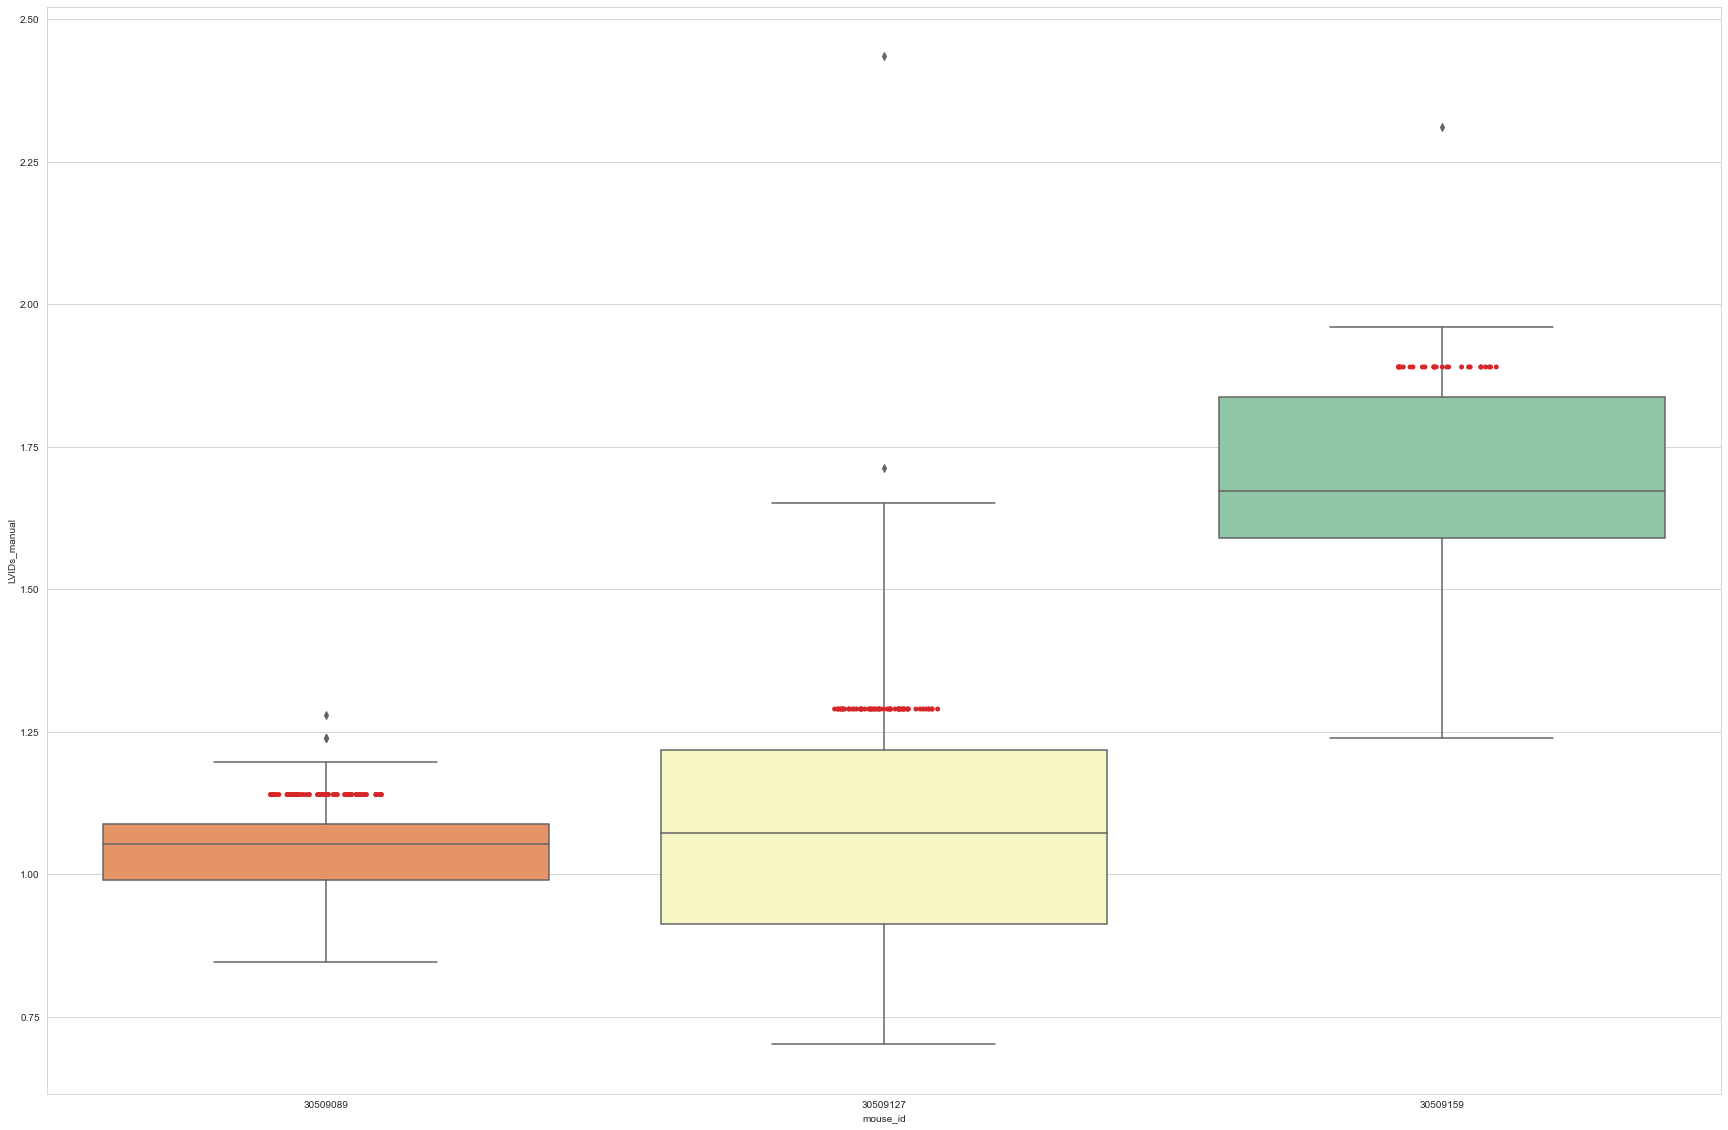

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

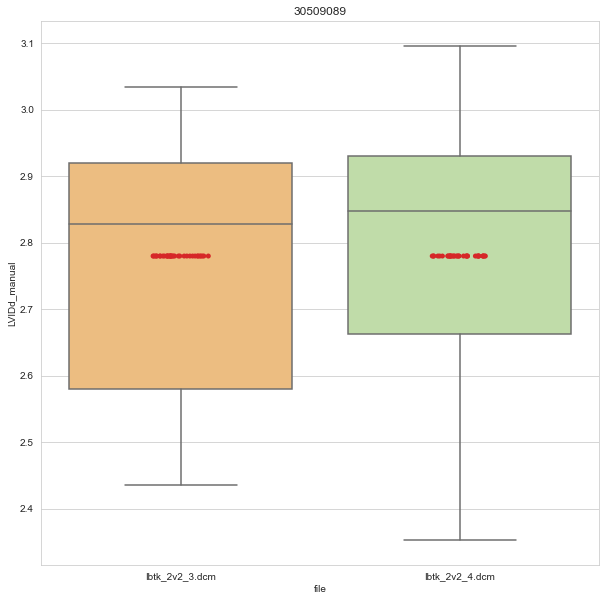

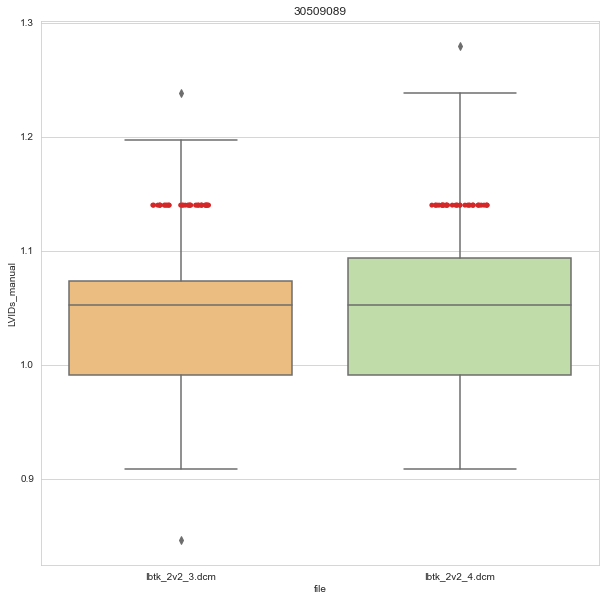

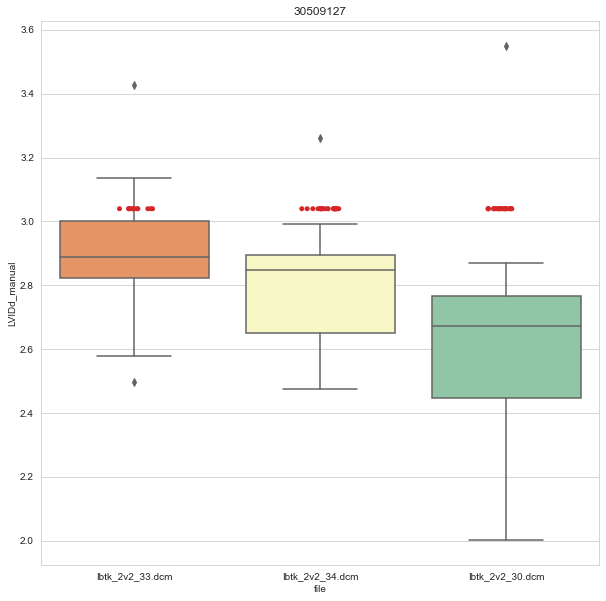

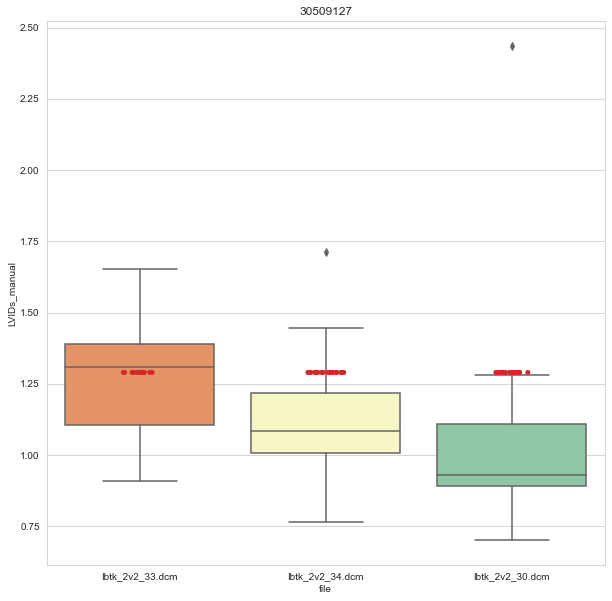

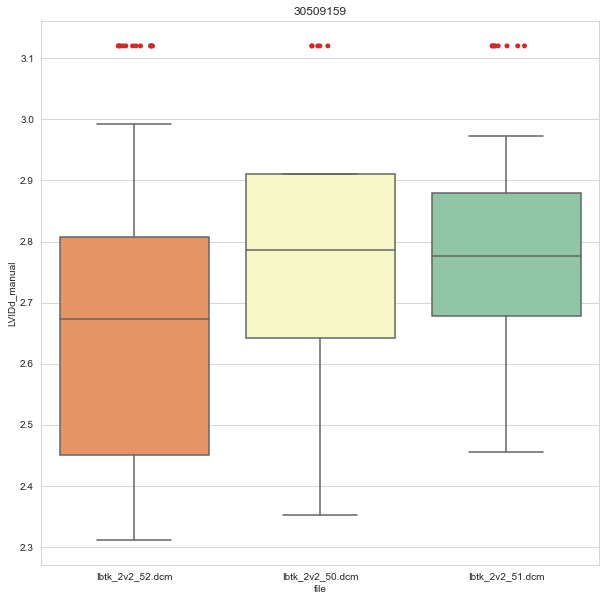

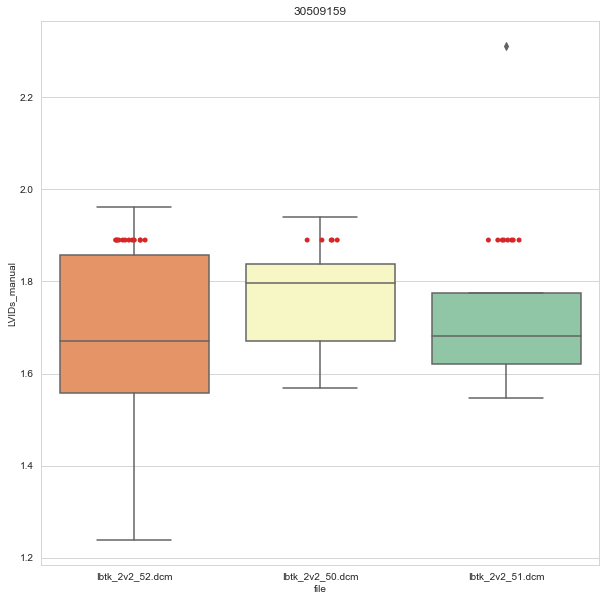

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
1447,30509089,Ibtk_2v2_1,10.005140,89.994860
1448,30509089,Ibtk_2v2_4,73.535457,26.464543
1449,30509089,Ibtk_2v2_3,68.237108,31.762892
1450,30509127,Ibtk_2v2_34,57.649477,42.350523
1451,30509127,Ibtk_2v2_30,52.363823,47.636177
1452,30509127,Ibtk_2v2_33,31.757451,68.242549
1453,30509159,Ibtk_2v2_50,31.192189,68.807811
1454,30509159,Ibtk_2v2_49,5.293815,94.706185
1455,30509159,Ibtk_2v2_51,20.592770,79.407230
1456,30509159,Ibtk_2v2_52,26.464543,73.535457


### Image quality per mouse

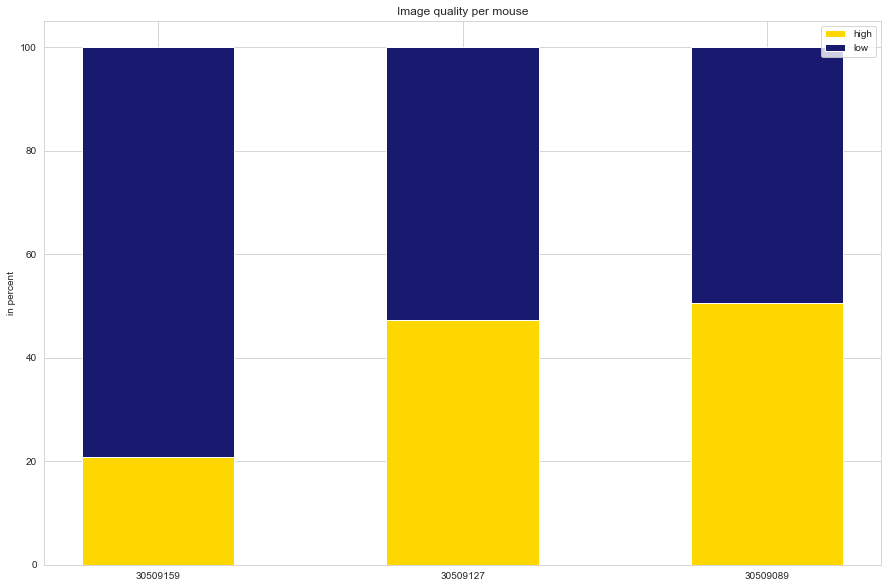

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Ibtk,37.71,62.29


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,153.00,153.00,153.00,153.00
mean,-0.17,-0.13,-0.35,0.72
std,0.28,0.20,7.39,7.33
min,-1.04,-0.65,-54.40,-41.08
25%,-0.33,-0.23,-1.52,-3.00
50%,-0.17,-0.13,0.84,1.05
75%,0.07,-0.05,3.27,5.23
max,0.51,1.15,13.17,19.39
number of mice,3.00,3.00,3.00,3.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,2,2
m,1,1


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')